In [9]:
from spectral_cube import SpectralCube #To read FITS
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, Angle
from skimage import measure
from astropy import wcs
import cube_x3d as c3
import matplotlib.pyplot as plt
from matplotlib import cm
from astroquery.skyview import SkyView

In [2]:
import importlib
importlib.reload(c3)

<module 'cube_x3d' from 'c:\\Users\\ixaka\\Documents\\Visualization\\cube_x3d\\cube_x3d.py'>

In [10]:
%cd c:\Users\ixaka\Documents\Visualization

c:\Users\ixaka\Documents\Visualization


In [11]:
import csv
with open('cube_x3d/stats_hickson_vla.csv', 'r') as file:
    reader = csv.reader(file)
    data = np.array(list(reader))
    head = data[0]
    print(head)
    data = np.delete(data, 0, axis=0)
    print(data)


['Name' 'FITS' 'HIcont' 'HIcont_p' 'Voxels' 'Image size' 'High/No' 'Tri2'
 'Tri3' 'Tri5' 'Levels']
[['HCG90_m' '1101.569' '381393.0' '0.13209788029925187' '288720000.0'
  '3.2936571647938755' '161.865' '23.388' '7.139' '1.62' '10.0']
 ['HCG97_m' '499.853' '428792.0' '0.32732213740458016' '131000000.0'
  '2.7710286381793945' '226.957' '31.68' '10.559' '1.934' '10.0']
 ['HCG30_m' '5413.62' '2563441.0' '0.1806359574947855' '1419120000.0'
  '1.000606395298031' '1002.884' 'NaN' 'NaN' 'NaN' '10.0']
 ['HCG31_m' '2624.68' '885862.0' '0.12875901162790698' '688000000.0'
  '2.783393573824208' '385.392' '53.561' '16.573' '3.607' '10.0']
 ['HCG16_m' '300.591' '122427.0' '0.15541845187089404' '78772500.0'
  '4.059415547456583' '49.795' '8.196' '2.806' '0.749' '10.0']
 ['HCG2' '15.76' '40655.0' '0.9846763005332342' '4128768.0'
  '0.32438720941554877' '25.396' '2.049' '0.85' '0.301' '10.0']
 ['H07' '55.006' '67608.0' '0.46891645951704547' '14417920.0'
  '0.5037330248623176' '33.716' '6.197' '2.215' '0

In [12]:
data[25] = np.array(['HCG56', '682.007', '6.91597243446143e-310', '3.86838085e-316',
       '178782208.0', '6.9159724193201e-310', np.nan, np.nan,
       np.nan, np.nan, '0.0'], dtype='<U21')

In [13]:
objects = data[:,0]
fits_size = data[:,1].astype(float)
hicont = data[:,2].astype(float)
hicont_p = data[:,3].astype(float)
voxels = data[:,4].astype(float)
im_size = data[:,5].astype(float)
highno = data[:,6].astype(float)
tri2 = data[:,7].astype(float)
tri3 = data[:,8].astype(float)
tri5 = data[:,9].astype(float)
lev = data[:,10].astype(float)

In [158]:
data[highno<40]

array([['HCG2', '15.76', '40655.0', '0.9846763005332342', '4128768.0',
        '0.32438720941554877', '25.396', '2.049', '0.85', '0.301',
        '10.0'],
       ['H07', '55.006', '67608.0', '0.46891645951704547', '14417920.0',
        '0.5037330248623176', '33.716', '6.197', '2.215', '0.31', '10.0'],
       ['HCG10', '54.006', '59178.0', '0.4180484347873264', '14155776.0',
        '0.8778635578057811', '19.595', '3.346', '1.221', '0.339',
        '10.0'],
       ['H19', '63.007', '60361.0', '0.3654903835720486', '16515072.0',
        '0.5164810787737611', '33.013', '4.139', '1.636', '0.62', '10.0'],
       ['HCG25', '54.006', '61635.0', '0.43540530734592015',
        '14155776.0', '0.7255910583393707', '20.699', '3.208', '1.179',
        '0.312', '10.0'],
       ['HCG26', '63.009', '44118.0', '0.26713779994419645',
        '16515072.0', '0.18677286664943607', '16.085', '2.434', '0.777',
        '0.183', '10.0'],
       ['HCG31', '15.76', '49619.0', '1.2017870706225198', '4128768.0',
 

In [156]:
data[hicont<3*10**4]

array([['HCG33', '3.51', '2523.0', '0.2749851771763393', '917504.0',
        '0.011775861743721437', '3.742', '0.581', '0.27', '0.114', '6.0'],
       ['HCG40', '14.507', '13425.0', '0.3531883502828664', '3801088.0',
        '0.32240144241996416', '5.278', '0.684', '0.377', '0.079',
        '10.0'],
       ['HCG49', '15.76', '21940.0', '0.5313933841765873', '4128768.0',
        '0.4615995883855499', '7.451', '1.142', '0.547', '0.134', '10.0'],
       ['HCG56', '682.007', '6.91597243446143e-310', '3.86838085e-316',
        '178782208.0', '6.9159724193201e-310', 'nan', 'nan', 'nan',
        'nan', '0.0'],
       ['HCG88', '14.01', '14862.0', '0.4049573625837054', '3670016.0',
        '0.0453938849739199', '6.636', '1.233', '0.487', '0.118', '10.0'],
       ['HCG90', '7.759', '3571.0', '0.17577140561995966', '2031616.0',
        '0.21335093007609257', '3.798', '0.449', '0.173', '0.096', '5.0'],
       ['H95', '12.011', '3583.0', '0.11390050252278645', '3145728.0',
        '0.0457704260058

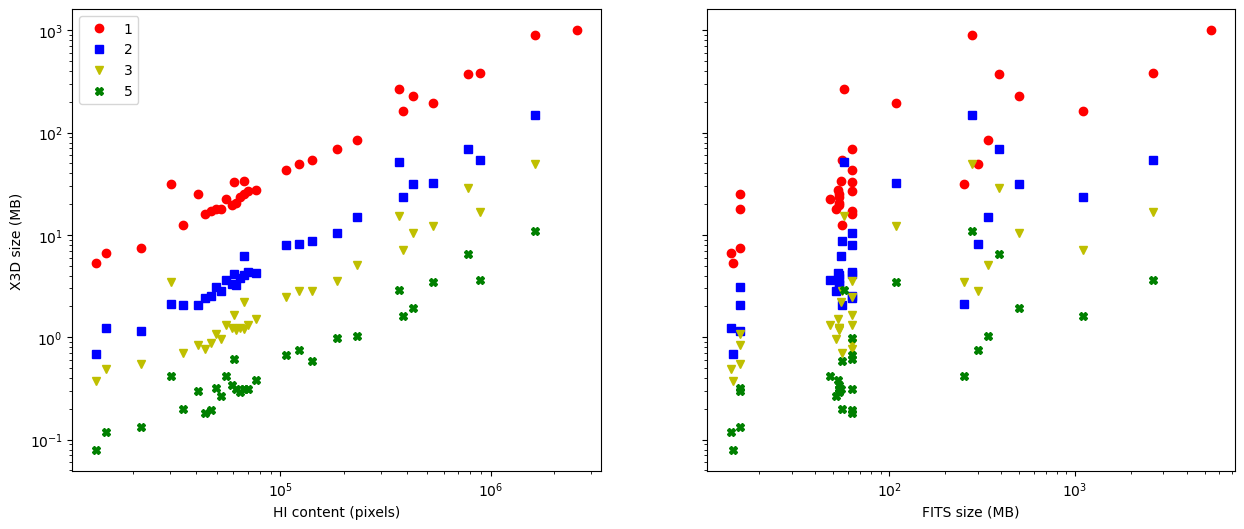

In [159]:
start = 0
fig, ax = plt.subplots(ncols=2, figsize=(15,6), sharey=True)
# fig.suitle('VLA')
plt.axes(ax[0])
plt.plot(hicont[lev==10][start:], highno[lev==10][start:], 'or', label='1')
plt.plot(hicont[lev==10][start:], tri2[lev==10][start:], 'sb', label='2')
plt.plot(hicont[lev==10][start:], tri3[lev==10][start:], 'vy', label='3')
plt.plot(hicont[lev==10][start:], tri5[lev==10][start:], 'Xg', label='5')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('HI content (pixels)')
plt.ylabel('X3D size (MB)')
plt.axes(ax[1])
plt.plot(fits_size[lev==10][start:], highno[lev==10][start:], 'or', label='1')
plt.plot(fits_size[lev==10][start:], tri2[lev==10][start:], 'sb', label='2')
plt.plot(fits_size[lev==10][start:], tri3[lev==10][start:], 'vy', label='3')
plt.plot(fits_size[lev==10][start:], tri5[lev==10][start:], 'Xg', label='5')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('FITS size (MB)');

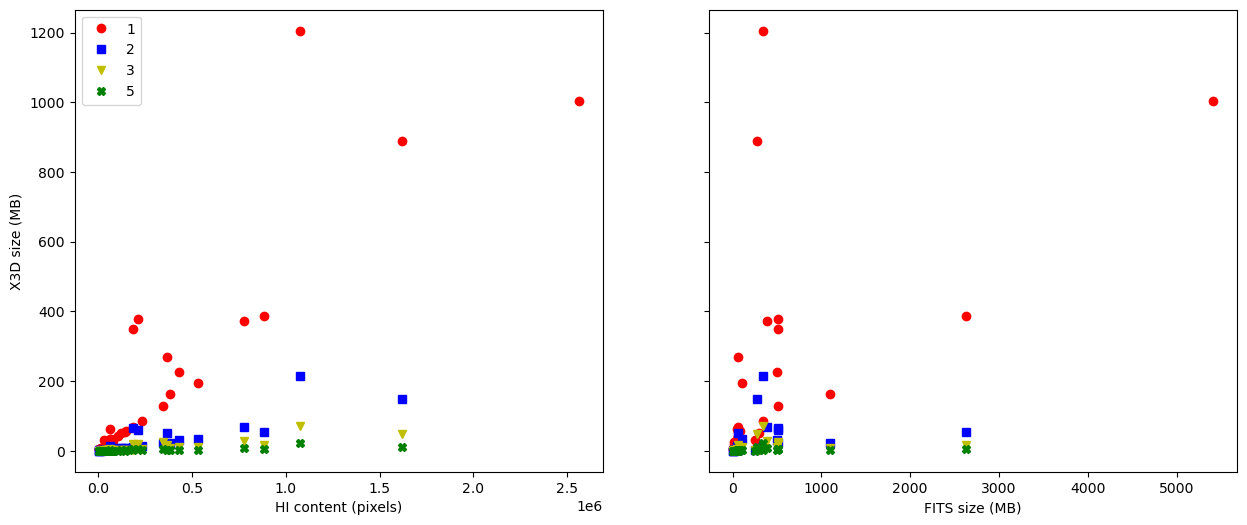

In [22]:
start = 0
fig, ax = plt.subplots(ncols=2, figsize=(15,6), sharey=True)
# fig.suptitle('VLA')
plt.axes(ax[0])
plt.plot(hicont[start:], highno[start:], 'or', label='1')
plt.plot(hicont[start:], tri2[start:], 'sb', label='2')
plt.plot(hicont[start:], tri3[start:], 'vy', label='3')
plt.plot(hicont[start:], tri5[start:], 'Xg', label='5')
plt.legend()
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel('HI content (pixels)')
plt.ylabel('X3D size (MB)')
plt.axes(ax[1])
plt.plot(fits_size[start:], highno[start:], 'or', label='1')
plt.plot(fits_size[start:], tri2[start:], 'sb', label='2')
plt.plot(fits_size[start:], tri3[start:], 'vy', label='3')
plt.plot(fits_size[start:], tri5[start:], 'Xg', label='5')
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel('FITS size (MB)');

In [133]:
data[5:][hicont[5:]>1e6]

array([['HCG22', '279.006', '1617424.0', '2.211463408658154',
        '73138176.0', '6.840398358853097', '890.041', '148.124',
        '48.816', '10.954', '10.0'],
       ['HCG38', '343.007', '1073815.0', '1.194250479383997',
        '89915392.0', '1.3169415478121316', '1205.137', '215.547',
        '72.29', '22.606', '8.0']], dtype='<U21')

In [18]:
data[:5]

array([['HCG90_m', '1101.569', '381393.0', '0.13209788029925187',
        '288720000.0', '3.2936571647938755', '161.865', '23.388',
        '7.139', '1.62', '10.0'],
       ['HCG97_m', '499.853', '428792.0', '0.32732213740458016',
        '131000000.0', '2.7710286381793945', '226.957', '31.68',
        '10.559', '1.934', '10.0'],
       ['HCG30_m', '5413.62', '2563441.0', '0.1806359574947855',
        '1419120000.0', '1.000606395298031', '1002.884', 'NaN', 'NaN',
        'NaN', '10.0'],
       ['HCG31_m', '2624.68', '885862.0', '0.12875901162790698',
        '688000000.0', '2.783393573824208', '385.392', '53.561',
        '16.573', '3.607', '10.0'],
       ['HCG16_m', '300.591', '122427.0', '0.15541845187089404',
        '78772500.0', '4.059415547456583', '49.795', '8.196', '2.806',
        '0.749', '10.0']], dtype='<U21')

In [24]:
highno[:5]

array([ 161.865,  226.957, 1002.884,  385.392,   49.795])

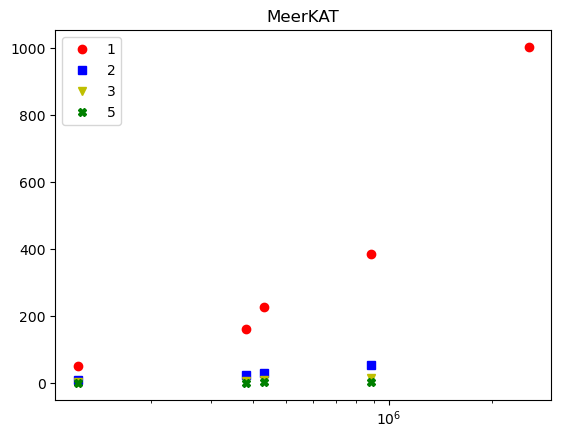

In [16]:
plt.plot(hicont[:5], highno[:5], 'or', label='1')
plt.plot(hicont[:5], tri2[:5], 'sb', label='2')
plt.plot(hicont[:5], tri3[:5], 'vy', label='3')
plt.plot(hicont[:5], tri5[:5], 'Xg', label='5')
plt.legend()
# plt.yscale('log')
plt.xscale('log')
plt.title('MeerKAT');